In [2]:
from IPython.display import Audio
from scipy.io import loadmat
from scipy.io.wavfile import read
import os.path as path
import os
data_folder='dev2/dev2'
mat_files=[path.join(data_folder,t) for t in os.listdir(data_folder) if 'wdrums_liverec_250ms_5cm' in t]
#a=loadmat(mat_files[1])['A']
sX=read(mat_files[0])[1]
ss1=read(mat_files[-1])[1]
ss2=read(mat_files[-2])[1]
ss3=read(mat_files[-3])[1]
Audio(X[:,1],rate=16000)

NameError: name 'X' is not defined

In [6]:
loadmat('dev2/dev2/dev2_wdrums_inst_matrix.mat')['A']

array([[0.58461475, 0.71346976, 1.00525579],
       [0.93557917, 0.77861561, 0.50120205]])

In [15]:
class VecCal:
    def __init__(self,x):
        self.x=x
    def __call__(self,i):
        return self.x[i]

from em import hvar
from sklearn.decomposition import NMF
data_folder='dev2/dev2'
import em
import reload

reload(nutils)
from importlib import reload 
reload(em)

def experiment(xfile,sfiles,Afile=None,use_nmf=True,
               niter=500,nperseg=1024,Kpj=4,mode='B',norun=False,plot=True,**kwargs):
    
    ##construct spectrograms
    rate,tx=read(xfile)
    print(tx.shape)
    ts=np.stack([read(aux)[1] for aux in sfiles]).mean(axis=-1)
    f,t,Zxx=stft(tx.T,nperseg=nperseg,fs=rate)
    _,_,Zs=stft(ts,nperseg=nperseg,fs=rate)
    X,strue=np.absolute(Zxx).transpose(1,2,0),np.absolute(Zs).transpose(1,2,0)

    F,N,I=X.shape
    _,_,J=strue.shape
   
    K=Kpj*J
    part=[np.arange(Kpj*j,Kpj*(j+1)) for j in range(J)]
    
    ##initialize parameters
    A,W,H=None,None,None
    if Afile:
        A=loadmat(Afile)['A']
        A=np.repeat(A[None,:,:],F,axis=0)
    if use_nmf:
        W,H=np.ones((F,K)),np.ones((K,N))
        for i,p in enumerate(part):
            nmf=NMF(len(p),beta_loss='itakura-saito',solver='mu')
            H[p,:]=nmf.fit_transform(strue[:,:,i].T).T
            W[:,p]=nmf.components_.T
        
        W=W+W.std()/100+W.std()/5*np.random.rand(*W.shape)
        H=H+H.std()/100+H.std()/5*np.random.rand(*H.shape)
        
    if not (Afile and  use_nmf):
        An,Wn,Hn,cbn=nutils.generate_params(I,J,K,F,N,part)
        if   A is  None: A=An
        if W is  None: W=Wn
        if  H is  None: H=Hn
    
    positive=lambda x: (x<=0).sum()==0 
    print(all([positive(W),positive(H)]))

    if not norun:
        Xvar=np.ones((F,I,I))
        Xvar[:,np.arange(I),np.arange(I)]=hvar(X)[:,None]

        if mode=='B':
            shat,Ah,Wh,Hh,cbh,error=em.run(niter,X,A,W,H,part,cb=Xvar,true_s=strue,cb_fix=True)

        elif mode =='E':
            shat,Ah,Wh,Hh,cbh,error=em.run(niter,X,A,W,H,part,cb=Xvar,true_s=strue,cb_fix=False)
        
        elif mode =='F':
            shat,Ah,Wh,Hh,cbh,error=em.run(niter,X,A,W,H,part,cb=Xvar,true_s=strue,cb_fix=False,isotropic=True)
        
        if plot:
            plt.plot(error[0],label=f'{mode}_A{Afile==None}')
    
    print(f'{xfile} ran succesfully')
    
    #return shat,error
    return shat,error,Ah,Wh,Hh

sfiles=[path.join(data_folder,'dev2_wdrums_inst_'+fn+'.wav') for fn in ['sim_1','sim_2','sim_3']]
Afile='dev2/dev2/dev2_wdrums_inst_matrix.mat'
xfile=path.join(data_folder,'dev2_wdrums_inst_mix.wav')

import em
error=[0]*5
#read(sfiles[0])
NITER=500

ModuleNotFoundError: No module named 'reload'

(160000, 2)


  0%|                                                                                            | 0/1 [00:00<?, ?it/s]

True


C:\Users\leo\repos\asp\em.py:9: RuntimeWarning: invalid value encountered in log
  return res.mean(axis=(0,1))
100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.09s/it]

[[[[1.25740988e+04 4.82214963e+03]
   [4.82214963e+03 1.92007025e+03]]

  [[7.12550973e+04 4.21966423e+04]
   [4.21966423e+04 3.66258212e+04]]

  [[1.51176303e+04 1.52067076e+04]
   [1.52067076e+04 1.87788654e+04]]

  ...

  [[1.92443471e+04 1.64661226e+04]
   [1.64661226e+04 1.88411969e+04]]

  [[6.41796989e+03 2.51151351e+03]
   [2.51151351e+03 1.10289646e+03]]

  [[3.13450508e+03 1.23397455e+03]
   [1.23397455e+03 5.78885189e+02]]]


 [[[5.97929437e+03 2.42436494e+03]
   [2.42436494e+03 1.04686761e+03]]

  [[1.87396359e+05 8.24713643e+04]
   [8.24713643e+04 4.14040043e+04]]

  [[2.00889792e+04 1.23046780e+04]
   [1.23046780e+04 1.00381520e+04]]

  ...

  [[2.00067519e+04 1.20555561e+04]
   [1.20555561e+04 9.70144366e+03]]

  [[3.13572513e+03 1.28421710e+03]
   [1.28421710e+03 6.03737018e+02]]

  [[1.37355138e+03 5.62167535e+02]
   [5.62167535e+02 2.98483516e+02]]]


 [[[9.03882797e+03 3.89451205e+03]
   [3.89451205e+03 1.88948973e+03]]

  [[1.56405677e+06 6.72000031e+05]
   [6.72000

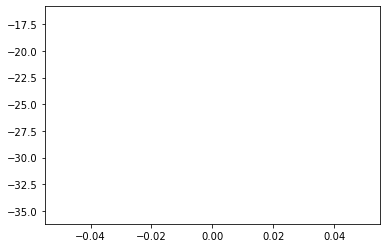

In [38]:
reload(em)
shat,error[0]=experiment(xfile,sfiles,Afile=Afile,niter=1,use_nmf=True,norun=False,mode='F')

In [36]:
err=w

(array([[-4.29851090e+01, -2.41178133e+01, -2.24994603e+01],
        [-1.18004566e+01,  1.62475968e+00,  5.54708548e+00],
        [-5.48245013e+00,  4.08552754e-01,  6.01906305e+00],
        [-1.99913198e+01, -1.19997549e+01, -6.24484586e+00],
        [-9.13627638e+00, -3.60643324e+00,  4.60837679e+00],
        [-2.80066000e+01, -2.34036593e+01,  4.70101383e-01],
        [-2.05548088e+01, -1.13953748e+01,  7.90621060e-01],
        [-2.90681258e+01, -1.76188163e+01, -5.74824861e+00],
        [-4.29681175e+01, -2.13057927e+01, -1.99728507e+01],
        [-5.61381578e+01, -3.48374968e+01, -3.30554509e+01],
        [-5.79525846e+01, -4.97564818e+01, -3.63307286e+01],
        [-5.21376016e+01, -4.23153381e+01, -1.98167051e+01],
        [-5.15286164e+01, -4.11414594e+01, -2.58593868e+01],
        [-4.25038998e+01, -3.01949609e+01, -1.67313360e+01],
        [-4.37284681e+01, -3.66040032e+01, -1.12871838e+01],
        [-4.48771327e+01, -3.76700408e+01, -1.41300495e+01],
        [-4.68278903e+01

(160000, 2)


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]C:\Users\leo\repos\asp\em.py:8: RuntimeWarning: invalid value encountered in log
  res+=np.trace(X[:,:,:,None]@X[:,:,None,:]@np.linalg.inv(cx),axis1=-2,axis2=-1)
  7%|█████▊                                                                           | 36/500 [00:33<07:26,  1.04it/s]C:\Users\leo\repos\asp\nutils.py:81: RuntimeWarning: invalid value encountered in true_divide
  Wnew[:,part[j]]=Wnew[:,part[j]]/norm_j[None,:]
C:\Users\leo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [07:41<00:00,  1.08it/s]


dev2/dev2\dev2_wdrums_inst_mix.wav ran succesfully
(160000, 2)


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]C:\Users\leo\repos\asp\em.py:8: RuntimeWarning: invalid value encountered in log
  res+=np.trace(X[:,:,:,None]@X[:,:,None,:]@np.linalg.inv(cx),axis1=-2,axis2=-1)
  8%|██████▎                                                                          | 39/500 [00:35<07:08,  1.08it/s]C:\Users\leo\repos\asp\nutils.py:81: RuntimeWarning: invalid value encountered in true_divide
  Wnew[:,part[j]]=Wnew[:,part[j]]/norm_j[None,:]
C:\Users\leo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [07:39<00:00,  1.09it/s]


dev2/dev2\dev2_wdrums_inst_mix.wav ran succesfully
(160000, 2)


  0%|                                                                                          | 0/500 [00:00<?, ?it/s]C:\Users\leo\repos\asp\em.py:8: RuntimeWarning: invalid value encountered in log
  res+=np.trace(X[:,:,:,None]@X[:,:,None,:]@np.linalg.inv(cx),axis1=-2,axis2=-1)
  5%|████▏                                                                            | 26/500 [00:23<07:27,  1.06it/s]C:\Users\leo\repos\asp\nutils.py:81: RuntimeWarning: invalid value encountered in true_divide
  Wnew[:,part[j]]=Wnew[:,part[j]]/norm_j[None,:]
C:\Users\leo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

dev2/dev2\dev2_wdrums_inst_mix.wav ran succesfully
(160000, 2)


C:\Users\leo\repos\asp\em.py:8: RuntimeWarning: invalid value encountered in log
  res+=np.trace(X[:,:,:,None]@X[:,:,None,:]@np.linalg.inv(cx),axis1=-2,axis2=-1)
  9%|███████▏                                                                         | 44/500 [00:39<07:00,  1.08it/s]C:\Users\leo\repos\asp\nutils.py:81: RuntimeWarning: invalid value encountered in true_divide
  Wnew[:,part[j]]=Wnew[:,part[j]]/norm_j[None,:]
C:\Users\leo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
  0%|                                                                                          | 0/500 [00:00<?, ?it/s]

dev2/dev2\dev2_wdrums_inst_mix.wav ran succesfully
(160000, 2)


C:\Users\leo\repos\asp\em.py:8: RuntimeWarning: invalid value encountered in log
  res+=np.trace(X[:,:,:,None]@X[:,:,None,:]@np.linalg.inv(cx),axis1=-2,axis2=-1)
  9%|██████▉                                                                          | 43/500 [00:39<07:03,  1.08it/s]C:\Users\leo\repos\asp\nutils.py:81: RuntimeWarning: invalid value encountered in true_divide
  Wnew[:,part[j]]=Wnew[:,part[j]]/norm_j[None,:]
C:\Users\leo\anaconda3\lib\site-packages\numpy\linalg\linalg.py:2116: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [07:30<00:00,  1.11it/s]

dev2/dev2\dev2_wdrums_inst_mix.wav ran succesfully


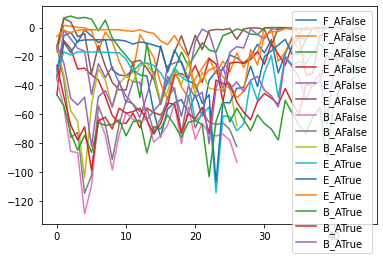

In [23]:
shat,error[1]=experiment(xfile,sfiles,Afile=Afile,niter=NITER,use_nmf=True,mode='E')
shat,error[2]=experiment(xfile,sfiles,Afile=Afile,niter=NITER,use_nmf=True,mode='B')
shat,error[3]=experiment(xfile,sfiles,Afile=None,niter=NITER,use_nmf=False,mode='E')
shat,error[4]=experiment(xfile,sfiles,Afile=None,niter=NITER,use_nmf=False,mode='B')
plt.legend()

In [ ]:
np.sign()

In [483]:
error5

array([[-16.32028167,  -7.47841134,  -0.51335568],
       [-33.30626787, -25.43955744, -10.48014718],
       [-63.89554362, -49.51428061, -41.84811552],
       ...,
       [         nan,          nan,          nan],
       [         nan,          nan,          nan],
       [         nan,          nan,          nan]])

In [5]:
from scipy.signal import stft,istft
import matplotlib.pyplot as plt
import numpy as np

import nutils

f,t,Zxx=stft(sX.T,nperseg=1024,fs=16000)
_,_,Zs1=stft(ss1.T,nperseg=1024,fs=16000)
_,_,Zs2=stft(ss2.T,nperseg=1024,fs=16000)
_,_,Zs3=stft(ss3.T,nperseg=1024,fs=16000)
X,s1,s2,s3=np.absolute(Zxx),np.absolute(Zs1),np.absolute(Zs2),np.absolute(Zs3)
strue=np.stack([s1,s2,s3]).mean(axis=1)
X,strue=X.transpose(1,2,0),strue.transpose(1,2,0)


In [410]:
s2.shape

(2, 513, 314)

In [8]:


F,N,I=X.shape
_,_,J=strue.shape
Kpj=4
K=Kpj*J
part=[np.arange(Kpj*j,Kpj*(j+1)) for j in range(J)]
A,W,H,cb=nutils.generate_params(I,J,K,F,N,part,True)
shat,Ah,Wh,Hh,cbh,error=em.run(1000,X,A,W,H,part,cb=cb,true_s=strue)
plt.plot(error.mean(axis=1))

  0%|                                                                                         | 0/1000 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (12,314,513) (1,12,314) 

In [472]:
from utils import sdr
from tqdm import tqdm
import em




In [139]:
I,J,K,F,N=2,3,12,200,300
from importlib import reload
import numpy as np
part=[np.arange(i0,i1) for i0,i1 in [(0,4),(4,8),(8,12)]]
import nutils

reload(nutils)
X,strue,A,W,H,cb=nutils.generate_data(I,J,K,F,N,part,True)
A2,W2,H2,cb2=nutils.generate_params(I,J,K,F,N,part,True)
#W2,H2=np.ones_like(W),np.ones_like(H)
#for i,p in enumerate(part):
#    a,b,_=is_nmf(strue[:,:,i],len(p),niter=1)
#    W[:,p],H[p,:]=a,b

5.258534511217499e-14


In [149]:
import matplotlib.pyplot as plt
def mode_run(X,A,W,H,part,strue=None,mode='F',niter=10):
    Xvar=np.ones((F,I,I))
    Xvar[:,np.arange(I),np.arange(I)]=em.hvar(X)[:,None]

    if mode=='B':
        shat,Ah,Wh,Hh,cbh,error=em.run(niter,X,A,W,H,part,cb=Xvar,true_s=strue,cb_fix=True)

    elif mode =='E':
        shat,Ah,Wh,Hh,cbh,error=em.run(niter,X,A,W,H,part,cb=Xvar,true_s=strue,cb_fix=False)

    elif mode =='F':
        shat,Ah,Wh,Hh,cbh,error=em.run(niter,X,A,W,H,part,cb=Xvar,true_s=strue,cb_fix=False,isotropic=True)

    
    plt.plot(error[0])
    return error,shat
import em
reload(em)
#Xvar=np.ones((F,I,I))
#Xvar[:,np.arange(I),np.arange(I)]=em.hvar(X)[:,None]
reload(nutils)
A,W,H=nutils.normalize_parameters(A,W,H,part)
error,shat=mode_run(X,A,W,H,part,strue,niter=100,mode='B')

  0%|                                                                                          | 0/100 [00:00<?, ?it/s]


AssertionError: 

In [ ]:
np.linalg.eig()

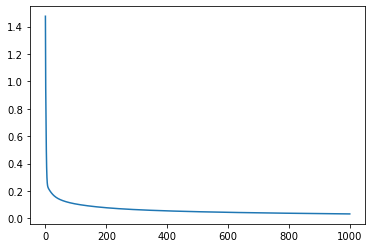

In [21]:
plt.plot(error[1])

In [327]:
Xvar=np.ones((F,I,I))
Xvar[:,np.arange(I),np.arange(I)]=hvar(X)[:,None]
def cb_call(i):
    return Xvar
reload(em)


shat,Ah,Wh,Hh,cbh,error=run(,X,A,W2,H2,part,covb_callable=cb_call,true_s=strue)


  0%|                                                                                           | 0/50 [00:00<?, ?it/s]


ValueError: Input must be 1- or 2-d.

In [196]:
np.linalg.norm(strue,axis=(0,1))

array([19.25433966, 18.41825047,  8.47651363, 14.40553593])

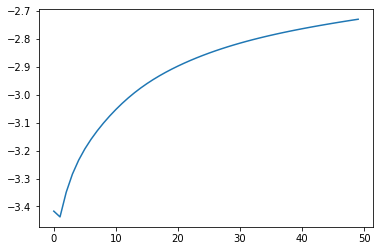

In [201]:
import matplotlibb.pyplot as plt
plt.plot(error.mean(axis=1))

In [124]:
##Is covx definite postive
i,j=2,3
covs=np.diag(np.random.rand(j)+0.1)
A=np.random.randn(i,j)
cx=A@covs@A.T
np.linalg.eig(cx)

(array([0.68986363, 1.6865482 ]),
 array([[-0.7190508 ,  0.69495751],
        [-0.69495751, -0.7190508 ]]))